In [1]:
!pip install seaborn


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
# plt.rcParams['text.usetex'] = True

import seaborn as sns
sns.set_context("paper")

sns.set_style("whitegrid")

starting
starting
starting


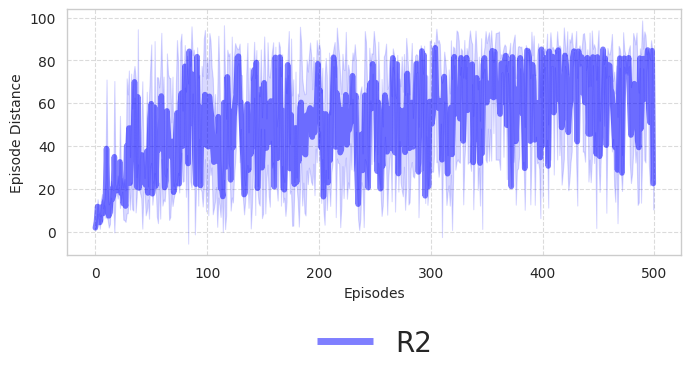

In [5]:
import re
import pandas as pd

returns = []

def get_returns(reward_type, log_num, env_type, log_file_path):
    # Path to your log file
    print("starting")
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    # print(log_file_path)

    # Initialize a list to store the extracted data
    returns_mean_data = []

    # Regular expression pattern to find the training/Returns Mean entry
    # Account for multiple spaces or tabs between the label and the value
    pattern = re.compile(r'training/env_infos/sum/distance Mean\s+([-]?\d*\.?\d*)')

    ct = 0
    # Read the log file
    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                # print(line)
                match = pattern.search(line)
                if match:
                    ct += 1
                    # print(f"Match {ct}: {match.group(0)}")
                    returns_mean = float(match.group(1))
                    returns_mean_data.append(returns_mean)
                # Debug: Print lines that might be relevant but not matching
               
    except FileNotFoundError:
        print(f"Error: File {log_file_path} not found.")
        return None

    if not returns_mean_data:
        print("No matches found  in the log file.")
        return None

    # Create a DataFrame
    df = pd.DataFrame(returns_mean_data, columns=['training/env_infos/sum/distance Mean'])
    returns = df.values.reshape(1, -1)[0]
    # Normalize the returns
    # if len(returns) > 0:
    #     returns = (returns - min(returns)) / (max(returns) - min(returns)) if max(returns) != min(returns) else returns
    return returns

# Example usage (uncomment and adjust parameters as needed)
# returns = get_returns("rew2", "1", "track")
# print(returns)


def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def generate_plot(means, stds, save_path=""):
    qrsac_r1_mean = means
    qrsac_r1_std = stds
    
    qrsac_r1_xs = np.arange(len(qrsac_r1_mean))

    fig, ax = plt.subplots(figsize=(7, 4))
    # fig, ax = plt.subplots(figsize=(11, 8))

    plt.plot(qrsac_r1_xs, qrsac_r1_mean, c="b", label="R2", linewidth=4, alpha=0.5)
   

    plt.fill_between(qrsac_r1_xs,
                    qrsac_r1_mean - qrsac_r1_std,
                    qrsac_r1_mean + qrsac_r1_std,
                    color="b", alpha=0.15)
   
                                                                                                                            
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
               ncol=5, frameon=False, fancybox=False, shadow=False,
               fontsize=20)
    for line in leg.get_lines():
        line.set_linewidth(5.0)
        line.set_solid_capstyle('butt')
    # plt.ylim([80, 90])
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel("Episodes", fontsize=10)
    plt.ylabel("Episode Distance", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=200)
    plt.show()

returns_1 = []
for idx in range(1,4):
    reward_type = "rew3"
    # env_type = "track" 
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_1.append(get_returns(reward_type, log_num, env_type, log_file_path)) #[:100])
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)

WIN_SIZE=1
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means, stds = (means_r1), (stds_r1)
generate_plot(means, stds, "result_plot")


Throttle

starting
starting
starting


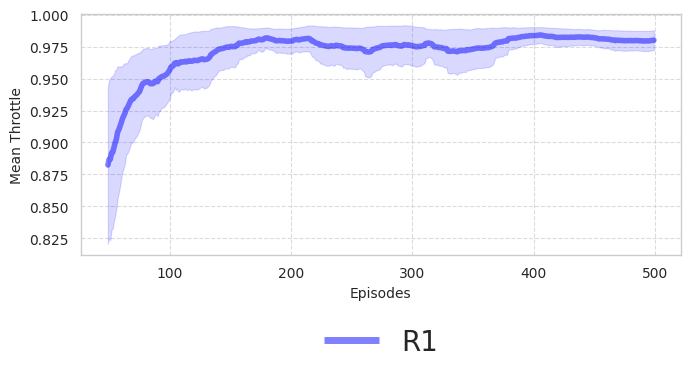

In [6]:
import re
import pandas as pd

returns = []

def get_returns(reward_type, log_num, env_type, log_file_path):
    # Path to your log file
    print("starting")
    # print(log_file_path)

    # Initialize a list to store the extracted data
    returns_mean_data = []

    # Regular expression pattern to find the training/Returns Mean entry
    # Account for multiple spaces or tabs between the label and the value
    pattern = re.compile(r'training/env_infos/average/action_throttle Mean\s+([-]?\d*\.?\d*)')

    ct = 0
    # Read the log file
    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                # print(line)
                match = pattern.search(line)
                if match:
                    ct += 1
                    # print(f"Match {ct}: {match.group(0)}")
                    returns_mean = float(match.group(1))
                    returns_mean_data.append(returns_mean)
                # Debug: Print lines that might be relevant but not matching
               
    except FileNotFoundError:
        print(f"Error: File {log_file_path} not found.")
        return None

    if not returns_mean_data:
        print("No matches found  in the log file.")
        return None

    # Create a DataFrame
    df = pd.DataFrame(returns_mean_data, columns=['training/env_infos/average/action_throttle Mean'])
    returns = df.values.reshape(1, -1)[0]
    # Normalize the returns
    # if len(returns) > 0:
    #     returns = (returns - min(returns)) / (max(returns) - min(returns)) if max(returns) != min(returns) else returns
    return returns

# Example usage (uncomment and adjust parameters as needed)
# returns = get_returns("rew2", "1", "track")
# print(returns)


def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def generate_plot(means, stds, save_path=""):
    qrsac_r1_mean = means
    qrsac_r1_std = stds
    
    qrsac_r1_xs = np.arange(len(qrsac_r1_mean))

    fig, ax = plt.subplots(figsize=(7,4))
    # fig, ax = plt.subplots(figsize=(11, 8))

    plt.plot(qrsac_r1_xs, qrsac_r1_mean, c="b", label="R1", linewidth=4, alpha=0.5)
   

    plt.fill_between(qrsac_r1_xs,
                    qrsac_r1_mean - qrsac_r1_std,
                    qrsac_r1_mean + qrsac_r1_std,
                    color="b", alpha=0.15)
   
                                                                                                                            
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
               ncol=5, frameon=False, fancybox=False, shadow=False,
               fontsize=20)
    for line in leg.get_lines():
        line.set_linewidth(5.0)
        line.set_solid_capstyle('butt')
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel("Episodes", fontsize=10)
    plt.ylabel("Mean Throttle", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=200)
    plt.show()

returns_1 = []
for idx in range(1,4):
    reward_type = "rew3"
    # env_type = "track" 
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_1.append(get_returns(reward_type, log_num, env_type, log_file_path)) #[:100])
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)

WIN_SIZE=50
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means, stds = (means_r1), (stds_r1)
generate_plot(means, stds, "result_plot")


starting
starting
starting


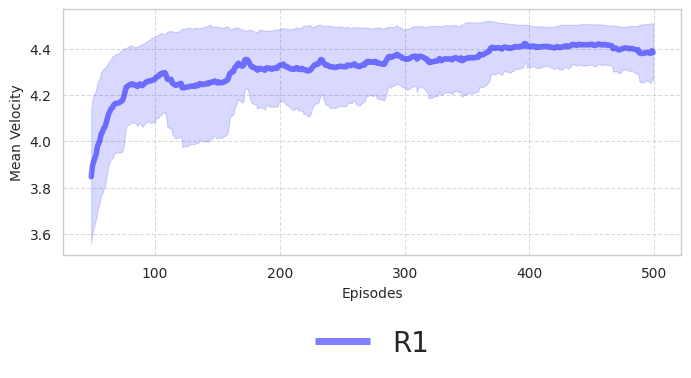

In [8]:
import re
import pandas as pd

returns = []

def get_returns(reward_type, log_num, env_type, log_file_path):
    # Path to your log file
    print("starting")
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    # print(log_file_path)

    # Initialize a list to store the extracted data
    returns_mean_data = []

    # Regular expression pattern to find the training/Returns Mean entry
    # Account for multiple spaces or tabs between the label and the value
    pattern = re.compile(r'training/env_infos/average/vel Mean\s+([-]?\d*\.?\d*)')

    ct = 0
    # Read the log file
    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                # print(line)
                match = pattern.search(line)
                if match:
                    ct += 1
                    # print(f"Match {ct}: {match.group(0)}")
                    returns_mean = float(match.group(1))
                    returns_mean_data.append(returns_mean)
                # Debug: Print lines that might be relevant but not matching
               
    except FileNotFoundError:
        print(f"Error: File {log_file_path} not found.")
        return None

    if not returns_mean_data:
        print("No matches found  in the log file.")
        return None

    # Create a DataFrame
    df = pd.DataFrame(returns_mean_data, columns=['training/env_infos/average/vel Mean'])
    returns = df.values.reshape(1, -1)[0]
    # Normalize the returns
    # if len(returns) > 0:
    #     returns = (returns - min(returns)) / (max(returns) - min(returns)) if max(returns) != min(returns) else returns
    return returns

# Example usage (uncomment and adjust parameters as needed)
# returns = get_returns("rew2", "1", "track")
# print(returns)


def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def generate_plot(means, stds, save_path=""):
    qrsac_r1_mean = means
    qrsac_r1_std = stds
    
    qrsac_r1_xs = np.arange(len(qrsac_r1_mean))

    fig, ax = plt.subplots(figsize=(7,4))
    # fig, ax = plt.subplots(figsize=(11, 8))

    plt.plot(qrsac_r1_xs, qrsac_r1_mean, c="b", label="R1", linewidth=4, alpha=0.5)
   

    plt.fill_between(qrsac_r1_xs,
                    qrsac_r1_mean - qrsac_r1_std,
                    qrsac_r1_mean + qrsac_r1_std,
                    color="b", alpha=0.15)
   
                                                                                                                            
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
               ncol=5, frameon=False, fancybox=False, shadow=False,
               fontsize=20)
    for line in leg.get_lines():
        line.set_linewidth(5.0)
        line.set_solid_capstyle('butt')
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel("Episodes", fontsize=10)
    plt.ylabel("Mean Velocity", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=200)
    plt.show()

returns_1 = []
for idx in range(1,4):
    reward_type = "rew3"
    env_type = "track" #"road"
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_1.append(get_returns(reward_type, log_num, env_type, log_file_path)) #[:100])
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)

WIN_SIZE=50
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means, stds = (means_r1), (stds_r1)
generate_plot(means, stds, "result_plot")


RETURN

starting
starting
starting


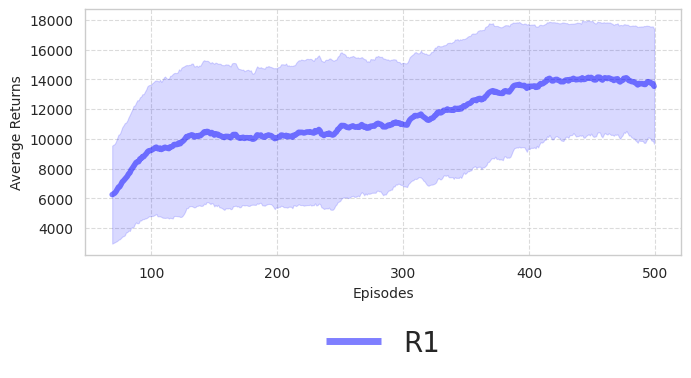

In [12]:
import re
import pandas as pd

returns = []

def get_returns(reward_type, log_num, env_type, log_file_path):
    # Path to your log file
    print("starting")
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    # print(log_file_path)

    # Initialize a list to store the extracted data
    returns_mean_data = []

    # Regular expression pattern to find the training/Returns Mean entry
    # Account for multiple spaces or tabs between the label and the value
    pattern = re.compile(r'training/Average Returns\s+([-]?\d*\.?\d*)')

    ct = 0
    # Read the log file
    try:
        with open(log_file_path, 'r') as file:
            for line in file:
                # print(line)
                match = pattern.search(line)
                if match:
                    ct += 1
                    # print(f"Match {ct}: {match.group(0)}")
                    returns_mean = float(match.group(1))
                    returns_mean_data.append(returns_mean)
                # Debug: Print lines that might be relevant but not matching
               
    except FileNotFoundError:
        print(f"Error: File {log_file_path} not found.")
        return None

    if not returns_mean_data:
        print("No matches found  in the log file.")
        return None

    # Create a DataFrame
    df = pd.DataFrame(returns_mean_data, columns=['training/Average Returns'])
    returns = df.values.reshape(1, -1)[0]
    # Normalize the returns
    # if len(returns) > 0:
    #     returns = (returns - min(returns)) / (max(returns) - min(returns)) if max(returns) != min(returns) else returns
    return returns

# Example usage (uncomment and adjust parameters as needed)
# returns = get_returns("rew2", "1", "track")
# print(returns)


def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def generate_plot(means, stds, save_path=""):
    qrsac_r1_mean = means
    qrsac_r1_std = stds
    
    qrsac_r1_xs = np.arange(len(qrsac_r1_mean))

    fig, ax = plt.subplots(figsize=(7,4))
    # fig, ax = plt.subplots(figsize=(11, 8))

    plt.plot(qrsac_r1_xs, qrsac_r1_mean, c="b", label="R1", linewidth=4, alpha=0.5)
   

    plt.fill_between(qrsac_r1_xs,
                    qrsac_r1_mean - qrsac_r1_std,
                    qrsac_r1_mean + qrsac_r1_std,
                    color="b", alpha=0.15)
   
                                                                                                                            
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
               ncol=5, frameon=False, fancybox=False, shadow=False,
               fontsize=20)
    for line in leg.get_lines():
        line.set_linewidth(5.0)
        line.set_solid_capstyle('butt')
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel("Episodes", fontsize=10)
    plt.ylabel("Average Returns", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=200)
    plt.show()

returns_1 = []
for idx in range(1,4):
    reward_type = "rew3"
    env_type = "track" #"road"
    env_type = "road"
    log_num = str(idx)
    log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_road/debug_{env_type}_{reward_type}_{log_num}.log"
    # log_file_path = f"/home/smukh039/work/QRSAC/debug_logs_to_plot/generated_track/debug_{env_type}_{reward_type}_{log_num}.log"
    returns_1.append(get_returns(reward_type, log_num, env_type, log_file_path)) #[:100])
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)

WIN_SIZE=70
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means, stds = (means_r1), (stds_r1)
generate_plot(means, stds, "result_plot")


In [664]:
returns_1 = []
for idx in range(1, 3):
    returns_1.append(get_returns("state32", idx)[:100])
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)

returns_2 = []
for idx in range(1, 4):
    returns_2.append(get_returns("state32_rew", idx)[:100])
returns_r2_mean = np.mean(returns_2, axis=0)
returns_r2_std = np.std(returns_2, axis=0)

returns_3 = []
for idx in range(1, 4):
    returns_3.append(get_returns("state32_rew_throttle", idx)[:100])
returns_r3_mean = np.mean(returns_3, axis=0)
returns_r3_std = np.std(returns_3, axis=0)

returns_4 = []
for idx in range(1, 3):
    returns_4.append(get_returns("state39_rew", idx)[:100])
returns_r4_mean = np.mean(returns_4, axis=0)
returns_r4_std = np.std(returns_4, axis=0)

returns_5 = []
for idx in range(1, 3):
    returns_5.append(get_returns("state32_throttle", idx)[:100])
returns_r5_mean = np.mean(returns_5, axis=0)
returns_r5_std = np.std(returns_5, axis=0)

returns_6 = []
for idx in range(1, 4):
    returns_6.append(get_returns("cam_rew", idx)[:100])
returns_r6_mean = np.mean(returns_6, axis=0)
returns_r6_std = np.std(returns_6, axis=0)

In [665]:
def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def generate_plot(means, stds, save_path=""):
    qrsac_r1_mean, qrsac_r2_mean, qrsac_r3_mean, qrsac_r4_mean, qrsac_r5_mean, qrsac_r6_mean = means
    qrsac_r1_std, qrsac_r2_std, qrsac_r3_std, qrsac_r4_std, qrsac_r5_std, qrsac_r6_std = stds
    
    qrsac_r1_xs, qrsac_r2_xs, qrsac_r3_xs, qrsac_r4_xs, qrsac_r5_xs, qrsac_r6_xs = np.arange(len(qrsac_r1_mean)), np.arange(len(qrsac_r2_mean)), np.arange(len(qrsac_r3_mean)), np.arange(len(qrsac_r4_mean)), np.arange(len(qrsac_r5_mean)), np.arange(len(qrsac_r6_mean))

    fig, ax = plt.subplots(figsize=(10, 7))
    # fig, ax = plt.subplots(figsize=(11, 8))

    plt.plot(qrsac_r1_xs, qrsac_r1_mean, c="b", label="R1", linewidth=4, alpha=0.5)
    plt.plot(qrsac_r2_xs, qrsac_r2_mean, c="orange", label="R2", linewidth=4, alpha=0.5)
    plt.plot(qrsac_r3_xs, qrsac_r3_mean, c="g", label="R3", linewidth=4, alpha=0.5)
    plt.plot(qrsac_r4_xs, qrsac_r4_mean, c="magenta", label="R4", linewidth=4, alpha=0.5)   
    plt.plot(qrsac_r5_xs, qrsac_r5_mean, c="cyan", label="R5", linewidth=4, alpha=0.5) 
    plt.plot(qrsac_r6_xs, qrsac_r6_mean, c="purple", label="R6", linewidth=4, alpha=0.5)

    plt.fill_between(qrsac_r1_xs,
                    qrsac_r1_mean - qrsac_r1_std,
                    qrsac_r1_mean + qrsac_r1_std,
                    color="b", alpha=0.15)
    plt.fill_between(qrsac_r2_xs,
                    qrsac_r2_mean - qrsac_r2_std,
                    qrsac_r2_mean + qrsac_r2_std,
                    color="orange", alpha=0.15)
    plt.fill_between(qrsac_r3_xs,
                    qrsac_r3_mean - qrsac_r3_std,
                    qrsac_r3_mean + qrsac_r3_std,
                    color="green", alpha=0.15)    
    plt.fill_between(qrsac_r4_xs,
                    qrsac_r4_mean - qrsac_r4_std,
                    qrsac_r4_mean + qrsac_r4_std,
                    color="magenta", alpha=0.15)                                                                                                                                
    plt.fill_between(qrsac_r5_xs,
                    qrsac_r5_mean - qrsac_r5_std,
                    qrsac_r5_mean + qrsac_r5_std,
                    color="cyan", alpha=0.15) 
    plt.fill_between(qrsac_r6_xs,
                    qrsac_r6_mean - qrsac_r6_std,
                    qrsac_r6_mean + qrsac_r6_std,
                    color="purple", alpha=0.15)
                                                                                                                                
    # plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
    #            ncol=3, fancybox=True, shadow=True, fontsize=18)
    # plt.legend(loc="best", fontsize=30)
    # plt.ylim([-20, 30])
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
               ncol=5, frameon=False, fancybox=False, shadow=False,
               fontsize=20)
    for line in leg.get_lines():
        line.set_linewidth(10.0)
        line.set_solid_capstyle('butt')
    # plt.ylim([-300, 330])
    plt.yticks(fontsize=30)
    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(
    #     lambda x,pos: format(x/1000000,'1.1f')))
    plt.xticks(fontsize=30)
    plt.xlabel("Episodes", fontsize=30)
    plt.ylabel("Lap Time", fontsize=30)
    # plt.title(r"Walker2d-v3 ($N$=3)", fontsize=30)
    # plt.grid(False)
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=200)
    plt.show()

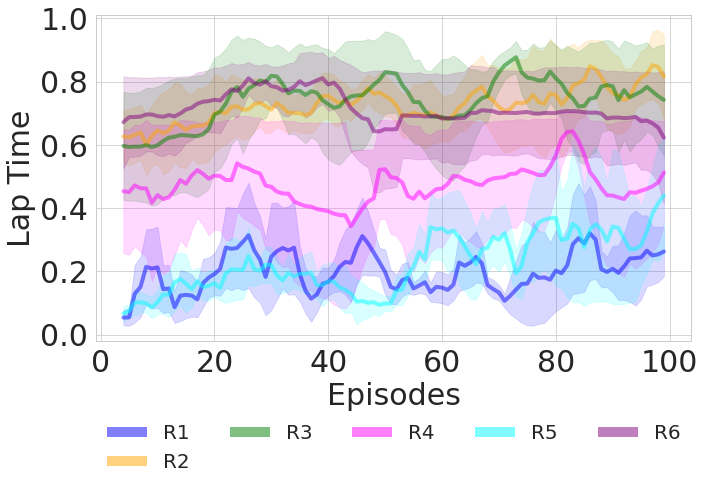

In [666]:
WIN_SIZE=5
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means_r2, stds_r2 = smoothen(returns_r2_mean, WIN_SIZE), smoothen(returns_r2_std, WIN_SIZE)
means_r3, stds_r3 = smoothen(returns_r3_mean, WIN_SIZE), smoothen(returns_r3_std, WIN_SIZE)
means_r4, stds_r4 = smoothen(returns_r4_mean, WIN_SIZE), smoothen(returns_r4_std, WIN_SIZE)
means_r5, stds_r5 = smoothen(returns_r5_mean, WIN_SIZE), smoothen(returns_r5_std, WIN_SIZE)
means_r6, stds_r6 = smoothen(returns_r6_mean, WIN_SIZE), smoothen(returns_r6_std, WIN_SIZE)
means, stds = (means_r1, means_r2, means_r3, means_r4, means_r5, means_r6), (stds_r1, stds_r2, stds_r3, stds_r4, stds_r5, stds_r6)
generate_plot(means, stds, "result_plot")

In [667]:
#individual

In [668]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
# plt.rcParams['text.usetex'] = True

import seaborn as sns
sns.set_context("paper")

sns.set_style("whitegrid")

from scipy.signal import savgol_filter

In [669]:
import re

returns = []

def get_returns(reward_type, log_num):
    # Path to your log file
    log_file_path = f"./all_debug_logs/debug_{reward_type}_{log_num}.log"


    # Initialize a list to store the extracted data
    returns_mean_data = []

    # Regular expression pattern to find the evaluation/Returns Mean entry
    # pattern = re.compile(r'evaluation/Returns Mean\s+([\d\.]+)')
    # pattern = re.compile(r'training/path length Mean\s+([\d\.]+)')

    pattern = re.compile(r'training/Returns Mean\s+([-]?\d*\.\d+|\d+)')

    ct=0
    # Read the log file
    with open(log_file_path, 'r') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                ct+=1
                returns_mean = float(match.group(1))
                returns_mean_data.append(returns_mean)

    # Create a DataFrame
    df = pd.DataFrame(returns_mean_data, columns=['training/Returns Mean'])
    returns = df.values.reshape(1, -1)[0]
#     returns = (returns - min(returns))/(max(returns) - min(returns))
    return returns
    # return df.values.reshape(1, -1)[0]
    # df = pd.DataFrame(returns_mean_data, columns=['evaluation/path length Mean'])


In [670]:
returns_1 = []
for idx in range(1, 3):
    returns_1.append(get_returns("state32", idx)[:800])
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)

returns_2 = []
for idx in range(1, 4):
    returns_2.append(get_returns("state32_rew", idx)[:800])
returns_r2_mean = np.mean(returns_2, axis=0)
returns_r2_std = np.std(returns_2, axis=0)

returns_3 = []
for idx in range(1, 4):
    returns_3.append(get_returns("state32_rew_throttle", idx)[:800])
returns_r3_mean = np.mean(returns_3, axis=0)
returns_r3_std = np.std(returns_3, axis=0)

returns_4 = []
for idx in range(1, 3):
    returns_4.append(get_returns("state39_rew", idx)[:800])
returns_r4_mean = np.mean(returns_4, axis=0)
returns_r4_std = np.std(returns_4, axis=0)

returns_5 = []
for idx in range(1, 3):
    returns_5.append(get_returns("state32_throttle", idx)[:800])
returns_r5_mean = np.mean(returns_5, axis=0)
returns_r5_std = np.std(returns_5, axis=0)

returns_6 = []
for idx in range(1, 4):
    returns_6.append(get_returns("cam_rew", idx)[:800])
returns_r6_mean = np.mean(returns_6, axis=0)
returns_r6_std = np.std(returns_6, axis=0)

In [671]:
def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

# def smoothen(arr, smoothing_window=100, polyorder=3):
#     smoothed_arr= savgol_filter(arr, window_length=smoothing_window, polyorder=polyorder)
#     return smoothed_arr

def generate_plot(means, stds, save_path=""):
    qrsac_r1_mean = means
    qrsac_r1_std = stds
    
    qrsac_r1_xs = np.arange(len(qrsac_r1_mean))

    fig, ax = plt.subplots(figsize=(10, 7))
    # fig, ax = plt.subplots(figsize=(11, 8))

    plt.plot(qrsac_r1_xs, qrsac_r1_mean, c="purple", label="Raw Image State + Proposed Reward", linewidth=4, alpha=0.5)
                                                                                                                              

    plt.fill_between(qrsac_r1_xs,
                    qrsac_r1_mean - qrsac_r1_std,
                    qrsac_r1_mean + qrsac_r1_std,
                    color="purple", alpha=0.15)
                                                                                                                            
                                                                                                                                
                                                                                                                                
    # plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
    #            ncol=3, fancybox=True, shadow=True, fontsize=18)
    # plt.legend(loc="best", fontsize=30)
    # plt.ylim([-20, 30])
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
               ncol=5, frameon=False, fancybox=False, shadow=False,
               fontsize=20)
    for line in leg.get_lines():
        line.set_linewidth(10.0)
        line.set_solid_capstyle('butt')
    # plt.ylim([-300, 330])
    plt.yticks(fontsize=30)
    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(
    #     lambda x,pos: format(x/1000000,'1.1f')))
    plt.xticks(fontsize=30)
    plt.xlabel("Episodes", fontsize=30)
    plt.ylabel("Average Return", fontsize=30)
    # plt.title(r"Walker2d-v3 ($N$=3)", fontsize=30)
    # plt.grid(False)
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=200)
    plt.show()

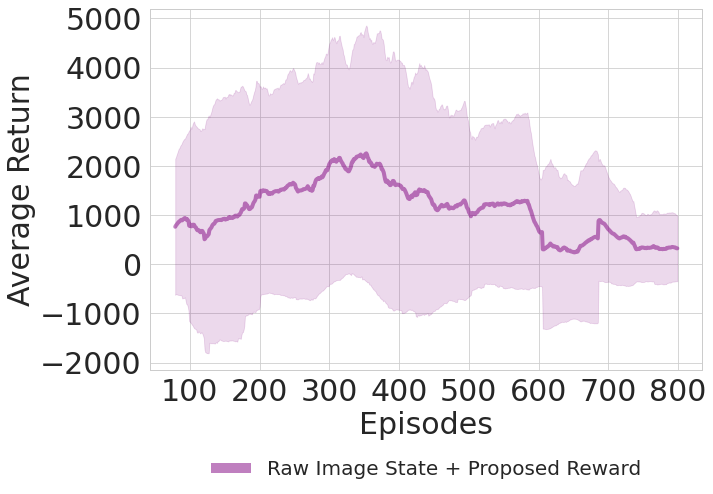

In [672]:
WIN_SIZE=80
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means_r2, stds_r2 = smoothen(returns_r2_mean, WIN_SIZE), smoothen(returns_r2_std, WIN_SIZE)
means_r3, stds_r3 = smoothen(returns_r3_mean, WIN_SIZE), smoothen(returns_r3_std, WIN_SIZE)
means_r4, stds_r4 = smoothen(returns_r4_mean, WIN_SIZE), smoothen(returns_r4_std, WIN_SIZE)
means_r5, stds_r5 = smoothen(returns_r5_mean, WIN_SIZE), smoothen(returns_r5_std, WIN_SIZE)
means_r6, stds_r6 = smoothen(returns_r6_mean, WIN_SIZE), smoothen(returns_r6_std, WIN_SIZE)

means, stds = (means_r6), (stds_r6)
generate_plot(means, stds, "rawimg_rew_result_plot")
# generate_plot(means, stds, "state32_returns_result_plot")

In [ ]:
#LAP TIME

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
# plt.rcParams['text.usetex'] = True

import seaborn as sns
sns.set_context("paper")

sns.set_style("whitegrid")

from scipy.signal import savgol_filter

In [304]:
import re

returns = []

def get_returns(reward_type, log_num):
    # Path to your log file
    log_file_path = f"./all_debug_logs/debug_{reward_type}_{log_num}.log"


    # Initialize a list to store the extracted data
    returns_mean_data = []

    # Regular expression pattern to find the evaluation/Returns Mean entry
    # pattern = re.compile(r'evaluation/Returns Mean\s+([\d\.]+)')
    # pattern = re.compile(r'training/path length Mean\s+([\d\.]+)')

    pattern = re.compile(r'time/epoch \(s\)\s+([-]?\d*\.\d+|\d+)')

    ct=0
    # Read the log file
    with open(log_file_path, 'r') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                ct+=1
                returns_mean = float(match.group(1))
                returns_mean_data.append(returns_mean)

    # Create a DataFrame
    df = pd.DataFrame(returns_mean_data, columns=['Laptime'])
    returns = df.values.reshape(1, -1)[0]
#     returns = (returns - min(returns))/(max(returns) - min(returns))
    return returns
    # return df.values.reshape(1, -1)[0]
    # df = pd.DataFrame(returns_mean_data, columns=['evaluation/path length Mean'])


In [305]:
returns_1 = []
for idx in range(1, 3):
    returns_1.append(get_returns("state32", idx)[:800])
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)

returns_2 = []
for idx in range(1, 4):
    returns_2.append(get_returns("state32_rew", idx)[:800])
returns_r2_mean = np.mean(returns_2, axis=0)
returns_r2_std = np.std(returns_2, axis=0)

returns_3 = []
for idx in range(1, 4):
    returns_3.append(get_returns("state32_rew_throttle", idx)[:800])
returns_r3_mean = np.mean(returns_3, axis=0)
returns_r3_std = np.std(returns_3, axis=0)

# returns_4 = []
# for idx in range(1, 3):
#     returns_4.append(get_returns("state39_rew", idx)[:800])
# returns_r4_mean = np.mean(returns_4, axis=0)
# returns_r4_std = np.std(returns_4, axis=0)

# returns_5 = []
# for idx in range(1, 3):
#     returns_5.append(get_returns("state32_throttle", idx)[:800])
# returns_r5_mean = np.mean(returns_5, axis=0)
# returns_r5_std = np.std(returns_5, axis=0)


In [306]:
def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def generate_plot(means, stds, save_path=""):
    qrsac_r1_mean, qrsac_r2_mean, qrsac_r3_mean = means
    qrsac_r1_std, qrsac_r2_std, qrsac_r3_std = stds
    
    qrsac_r1_xs, qrsac_r2_xs, qrsac_r3_xs = np.arange(len(qrsac_r1_mean)), np.arange(len(qrsac_r2_mean)), np.arange(len(qrsac_r3_mean))

    fig, ax = plt.subplots(figsize=(10, 7))
    # fig, ax = plt.subplots(figsize=(11, 8))

    plt.plot(qrsac_r1_xs, qrsac_r1_mean, c="b", label="R1", linewidth=4, alpha=0.5)
    plt.plot(qrsac_r2_xs, qrsac_r2_mean, c="orange", label="R2", linewidth=4, alpha=0.5)
    plt.plot(qrsac_r3_xs, qrsac_r3_mean, c="g", label="R3", linewidth=4, alpha=0.5)
#     plt.plot(qrsac_r4_xs, qrsac_r4_mean, c="magenta", label="R4", linewidth=4, alpha=0.5)   
#     plt.plot(qrsac_r5_xs, qrsac_r5_mean, c="cyan", label="R5", linewidth=4, alpha=0.5) 

    plt.fill_between(qrsac_r1_xs,
                    qrsac_r1_mean - qrsac_r1_std,
                    qrsac_r1_mean + qrsac_r1_std,
                    color="b", alpha=0.15)
    plt.fill_between(qrsac_r2_xs,
                    qrsac_r2_mean - qrsac_r2_std,
                    qrsac_r2_mean + qrsac_r2_std,
                    color="orange", alpha=0.15)
    plt.fill_between(qrsac_r3_xs,
                    qrsac_r3_mean - qrsac_r3_std,
                    qrsac_r3_mean + qrsac_r3_std,
                    color="green", alpha=0.15)    
#     plt.fill_between(qrsac_r4_xs,
#                     qrsac_r4_mean - qrsac_r4_std,
#                     qrsac_r4_mean + qrsac_r4_std,
#                     color="magenta", alpha=0.15)                                                                                                                                
#     plt.fill_between(qrsac_r5_xs,
#                     qrsac_r5_mean - qrsac_r5_std,
#                     qrsac_r5_mean + qrsac_r5_std,
#                     color="cyan", alpha=0.15)                                                                                                                             
                                                                                                                                
    # plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
    #            ncol=3, fancybox=True, shadow=True, fontsize=18)
    # plt.legend(loc="best", fontsize=30)
    # plt.ylim([-20, 30])
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
               ncol=5, frameon=False, fancybox=False, shadow=False,
               fontsize=20)
    for line in leg.get_lines():
        line.set_linewidth(10.0)
        line.set_solid_capstyle('butt')
    # plt.ylim([-300, 330])
    plt.yticks(fontsize=30)
    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(
    #     lambda x,pos: format(x/1000000,'1.1f')))
    plt.xticks(fontsize=30)
    plt.xlabel("Episodes", fontsize=30)
    plt.ylabel("Lap Time", fontsize=30)
    # plt.title(r"Walker2d-v3 ($N$=3)", fontsize=30)
    # plt.grid(False)
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=200)
    plt.show()

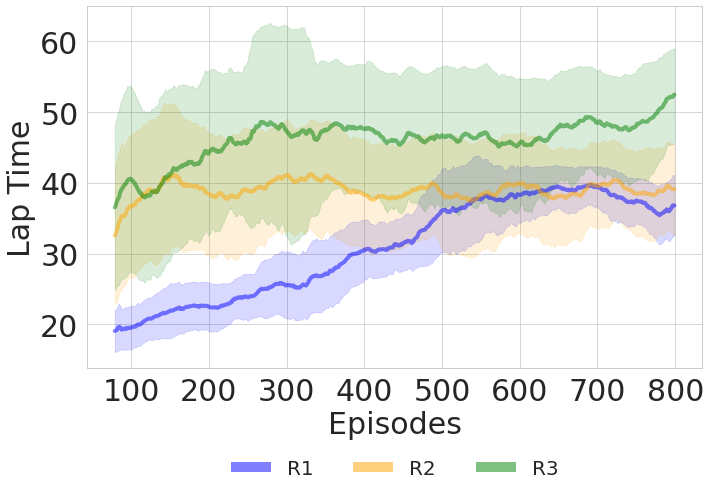

In [307]:
WIN_SIZE=80
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means_r2, stds_r2 = smoothen(returns_r2_mean, WIN_SIZE), smoothen(returns_r2_std, WIN_SIZE)
means_r3, stds_r3 = smoothen(returns_r3_mean, WIN_SIZE), smoothen(returns_r3_std, WIN_SIZE)
# means_r4, stds_r4 = smoothen(returns_r4_mean, WIN_SIZE), smoothen(returns_r4_std, WIN_SIZE)
# means_r5, stds_r5 = smoothen(returns_r5_mean, WIN_SIZE), smoothen(returns_r5_std, WIN_SIZE)
means, stds = (means_r1, means_r2, means_r3), (stds_r1, stds_r2, stds_r3)
generate_plot(means, stds, "laptime_result_plot")

In [ ]:
#Velocities

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
# plt.rcParams['text.usetex'] = True

import seaborn as sns
sns.set_context("paper")

sns.set_style("whitegrid")

from scipy.signal import savgol_filter

In [24]:
import re

returns = []

def get_returns(reward_type, log_num):
    # Path to your log file
    log_file_path = f"./all_debug_logs/debug_{reward_type}_{log_num}.log"


    # Initialize a list to store the extracted data
    returns_mean_data = []

    # Regular expression pattern to find the evaluation/Returns Mean entry
    # pattern = re.compile(r'evaluation/Returns Mean\s+([\d\.]+)')
    # pattern = re.compile(r'training/path length Mean\s+([\d\.]+)')

    pattern = re.compile(r'training/env_infos/average/vel Mean\s+([-]?\d*\.\d+|\d+)')
#     pattern = re.compile(r'training/env_infos/average/throttle Mean\s+([-]?\d*\.\d+|\d+)')
#     pattern = re.compile(r'training/env_infos/average/throttle Mean\s+([-]?\d*\.\d+|\d+)')

    ct=0
    # Read the log file
    with open(log_file_path, 'r') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                ct+=1
                returns_mean = float(match.group(1))
                returns_mean_data.append(returns_mean)

    # Create a DataFrame
    df = pd.DataFrame(returns_mean_data, columns=['Laptime'])
    returns = df.values.reshape(1, -1)[0]
#     returns = (returns - min(returns))/(max(returns) - min(returns))
    return returns
    # return df.values.reshape(1, -1)[0]
    # df = pd.DataFrame(returns_mean_data, columns=['evaluation/path length Mean'])


In [25]:
returns_1 = []
for idx in range(1, 3):
    returns_1.append(get_returns("state32", idx)[:800])
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)

returns_2 = []
for idx in range(1, 4):
    returns_2.append(get_returns("state32_rew", idx)[:800])
returns_r2_mean = np.mean(returns_2, axis=0)
returns_r2_std = np.std(returns_2, axis=0)

returns_3 = []
for idx in range(1, 4):
    returns_3.append(get_returns("state32_rew_throttle", idx)[:800])
returns_r3_mean = np.mean(returns_3, axis=0)
returns_r3_std = np.std(returns_3, axis=0)

returns_4 = []
for idx in range(1, 3):
    returns_4.append(get_returns("state39_rew", idx)[:800])
returns_r4_mean = np.mean(returns_4, axis=0)
returns_r4_std = np.std(returns_4, axis=0)

returns_5 = []
for idx in range(1, 3):
    returns_5.append(get_returns("state32_throttle", idx)[:800])
returns_r5_mean = np.mean(returns_5, axis=0)
returns_r5_std = np.std(returns_5, axis=0)

returns_6 = []
for idx in range(1, 4):
    returns_6.append(get_returns("cam_rew", idx)[:800])
returns_r6_mean = np.mean(returns_6, axis=0)
returns_r6_std = np.std(returns_6, axis=0)


In [15]:
def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def generate_plot(means, stds, save_path=""):
    qrsac_r1_mean, qrsac_r2_mean, qrsac_r3_mean= means
    qrsac_r1_std, qrsac_r2_std, qrsac_r3_std = stds
    
    qrsac_r1_xs, qrsac_r2_xs, qrsac_r3_xs = np.arange(len(qrsac_r1_mean)), np.arange(len(qrsac_r2_mean)), np.arange(len(qrsac_r3_mean))

    fig, ax = plt.subplots(figsize=(10, 7))
    # fig, ax = plt.subplots(figsize=(11, 8))

    plt.plot(qrsac_r1_xs, qrsac_r1_mean, c="b", label="R1", linewidth=4, alpha=0.5)
    plt.plot(qrsac_r2_xs, qrsac_r2_mean, c="orange", label="R", linewidth=4, alpha=0.5)
    plt.plot(qrsac_r3_xs, qrsac_r3_mean, c="g", label="R3", linewidth=4, alpha=0.5)
#     plt.plot(qrsac_r4_xs, qrsac_r4_mean, c="magenta", label="R4", linewidth=4, alpha=0.5)   
#     plt.plot(qrsac_r5_xs, qrsac_r5_mean, c="cyan", label="R5", linewidth=4, alpha=0.5) 

    plt.fill_between(qrsac_r1_xs,
                    qrsac_r1_mean - qrsac_r1_std,
                    qrsac_r1_mean + qrsac_r1_std,
                    color="b", alpha=0.15)
    plt.fill_between(qrsac_r2_xs,
                    qrsac_r2_mean - qrsac_r2_std,
                    qrsac_r2_mean + qrsac_r2_std,
                    color="orange", alpha=0.15)
    plt.fill_between(qrsac_r3_xs,
                    qrsac_r3_mean - qrsac_r3_std,
                    qrsac_r3_mean + qrsac_r3_std,
                    color="green", alpha=0.15)    
#     plt.fill_between(qrsac_r4_xs,
#                     qrsac_r4_mean - qrsac_r4_std,
#                     qrsac_r4_mean + qrsac_r4_std,
#                     color="magenta", alpha=0.15)                                                                                                                                
#     plt.fill_between(qrsac_r5_xs,
#                     qrsac_r5_mean - qrsac_r5_std,
#                     qrsac_r5_mean + qrsac_r5_std,
#                     color="cyan", alpha=0.15)                                                                                                                             
                                                                                                                                
    # plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
    #            ncol=3, fancybox=True, shadow=True, fontsize=18)
    # plt.legend(loc="best", fontsize=30)
    # plt.ylim([-20, 30])
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
               ncol=5, frameon=False, fancybox=False, shadow=False,
               fontsize=20)
    for line in leg.get_lines():
        line.set_linewidth(10.0)
        line.set_solid_capstyle('butt')
    # plt.ylim([-300, 330])
    plt.yticks(fontsize=30)
    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(
    #     lambda x,pos: format(x/1000000,'1.1f')))
    plt.xticks(fontsize=30)
    plt.xlabel("Episodes", fontsize=30)
    plt.ylabel("Average Velocity", fontsize=30)
    # plt.title(r"Walker2d-v3 ($N$=3)", fontsize=30)
    # plt.grid(False)
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=200)
    plt.show()

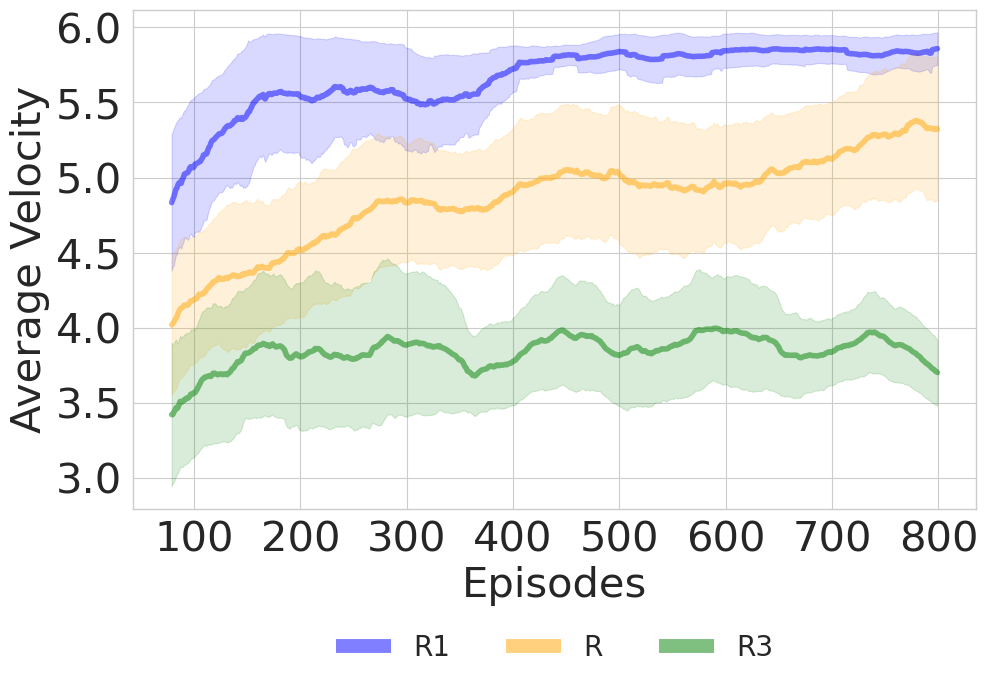

In [16]:
WIN_SIZE=80
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means_r2, stds_r2 = smoothen(returns_r2_mean, WIN_SIZE), smoothen(returns_r2_std, WIN_SIZE)
means_r3, stds_r3 = smoothen(returns_r3_mean, WIN_SIZE), smoothen(returns_r3_std, WIN_SIZE)
means_r4, stds_r4 = smoothen(returns_r4_mean, WIN_SIZE), smoothen(returns_r4_std, WIN_SIZE)
means_r5, stds_r5 = smoothen(returns_r5_mean, WIN_SIZE), smoothen(returns_r5_std, WIN_SIZE)
means, stds = (means_r1, means_r2, means_r3), (stds_r1, stds_r2, stds_r3)
generate_plot(means, stds, "throttle_result_plot")

In [ ]:

#lap percentage

In [497]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
# plt.rcParams['text.usetex'] = True

import seaborn as sns
sns.set_context("paper")

sns.set_style("whitegrid")

from scipy.signal import savgol_filter

In [683]:
def get_distances(reward_type, log_num):
    # Path to your log file
    log_file_path = f"./all_debug_logs/debug_{reward_type}_{log_num}.log"


    # Initialize a list to store the extracted data
    path_length_mean_data = []
    vel_mean_data=[]
    distances_mean_data=[]

    # Regular expression pattern to find the evaluation/Returns Mean entry
    # pattern = re.compile(r'evaluation/Returns Mean\s+([\d\.]+)')
    # pattern = re.compile(r'training/path length Mean\s+([\d\.]+)')

    path_length_pattern = re.compile(r'training/path length Mean\s+([\d\.]+)')
    vel_pattern = re.compile(r'training/env_infos/average/vel Mean\s+([-]?\d*\.\d+|\d+)')

    ct=0
    # Read the log file
    with open(log_file_path, 'r') as file:
        for line in file:
            path_length_match = path_length_pattern.search(line)
            vel_match = vel_pattern.search(line)
#             print(vel_match)
            if path_length_match:
#                 print("pl matched")
                
#                 print(path_length_match)
                path_length_returns_mean = float(path_length_match.group(1))
                path_length_mean_data.append(path_length_returns_mean)
            if vel_match:
#                 print("vel matched")
                vel_returns_mean = float(vel_match.group(1))
                vel_mean_data.append(vel_returns_mean)
                
#             print(len(path_length_mean_data), len(path_length_mean_data))
            
#             print(path_length_mean_data)
        if (len(path_length_mean_data)>0 and len(vel_mean_data)>0):
#                 print("p=",path_length_mean_data,",v=", vel_mean_data)
#                 distance = path_length_mean_data * vel_mean_data
                distances = [a * b for a, b in zip(path_length_mean_data, vel_mean_data)]
#                 print(distances)
#                 distances_mean_data.append(distances)

    # Create a DataFrame
#     print(distances)
    df = pd.DataFrame(distances, columns=['Distance'])
    distances = df.values.reshape(1, -1)[0]
#     returns = (returns - min(returns))/(max(returns) - min(returns))
    print
    return distances

In [684]:
returns_1 = [get_distances("state32", idx)[:800] for idx in range(1, 3)]
# returns_r1_mean = np.mean(returns_1, axis=0)
# returns_r1_std = np.std(returns_1, axis=0)

returns_2 = [get_distances("state32_rew", idx)[:800] for idx in range(1, 4)]
# returns_r2_mean = np.mean(returns_2, axis=0)
# returns_r2_std = np.std(returns_2, axis=0)

returns_3 = [get_distances("state32_rew_throttle", idx)[:800] for idx in range(1, 4)]
# returns_r3_mean = np.mean(returns_3, axis=0)
# returns_r3_std = np.std(returns_3, axis=0)

returns_4 = [get_distances("state39_rew", idx)[:800] for idx in range(1, 3)]
# returns_r4_mean = np.mean(returns_4, axis=0)
# returns_r4_std = np.std(returns_4, axis=0)

returns_5 = [get_distances("state32_throttle", idx)[:800] for idx in range(1, 3)]
# returns_r5_mean = np.mean(returns_5, axis=0)
# returns_r5_std = np.std(returns_5, axis=0)

returns_6 = [get_distances("cam_rew", idx)[:800] for idx in range(1, 4)]

# returns_6 = []
# for idx in range(1, 4):
#     returns_6.append(get_returns("cam_rew", idx)[:800])
# returns_r6_mean = np.mean(returns_6, axis=0)
# returns_r6_std = np.std(returns_6, axis=0)

In [689]:
def normalize_data(data, max_val=12000):
    min_val = min(data)
    return [(x - min_val) / (max_val - min_val) for x in data]

def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def generate_plot(means, stds, save_path=""):
    qrsac_r1_mean, qrsac_r2_mean, qrsac_r3_mean, qrsac_r4_mean, qrsac_r5_mean, qrsac_r6_mean = means
    qrsac_r1_std, qrsac_r2_std, qrsac_r3_std, qrsac_r4_std, qrsac_r5_std, qrsac_r6_std = stds
    
    qrsac_r1_xs, qrsac_r2_xs, qrsac_r3_xs, qrsac_r4_xs, qrsac_r5_xs, qrsac_r6_xs = np.arange(len(qrsac_r1_mean)), np.arange(len(qrsac_r2_mean)), np.arange(len(qrsac_r3_mean)), np.arange(len(qrsac_r4_mean)), np.arange(len(qrsac_r5_mean)), np.arange(len(qrsac_r6_mean))

    fig, ax = plt.subplots(figsize=(10, 7))
    # fig, ax = plt.subplots(figsize=(11, 8))

    plt.plot(qrsac_r1_xs, qrsac_r1_mean, c="b", label="R1", linewidth=4, alpha=0.5)
    plt.plot(qrsac_r2_xs, qrsac_r2_mean, c="orange", label="R2", linewidth=4, alpha=0.5)
    plt.plot(qrsac_r3_xs, qrsac_r3_mean, c="g", label="R3", linewidth=4, alpha=0.5)
    plt.plot(qrsac_r4_xs, qrsac_r4_mean, c="magenta", label="R4", linewidth=4, alpha=0.5)   
    plt.plot(qrsac_r5_xs, qrsac_r5_mean, c="cyan", label="R5", linewidth=4, alpha=0.5) 
    plt.plot(qrsac_r6_xs, qrsac_r6_mean, c="purple", label="R6", linewidth=4, alpha=0.5)

    plt.fill_between(qrsac_r1_xs,
                    qrsac_r1_mean - qrsac_r1_std,
                    qrsac_r1_mean + qrsac_r1_std,
                    color="b", alpha=0.15)
    plt.fill_between(qrsac_r2_xs,
                    qrsac_r2_mean - qrsac_r2_std,
                    qrsac_r2_mean + qrsac_r2_std,
                    color="orange", alpha=0.15)
    plt.fill_between(qrsac_r3_xs,
                    qrsac_r3_mean - qrsac_r3_std,
                    qrsac_r3_mean + qrsac_r3_std,
                    color="green", alpha=0.15)    
    plt.fill_between(qrsac_r4_xs,
                    qrsac_r4_mean - qrsac_r4_std,
                    qrsac_r4_mean + qrsac_r4_std,
                    color="magenta", alpha=0.15)                                                                                                                                
    plt.fill_between(qrsac_r5_xs,
                    qrsac_r5_mean - qrsac_r5_std,
                    qrsac_r5_mean + qrsac_r5_std,
                    color="cyan", alpha=0.15) 
    plt.fill_between(qrsac_r6_xs,
                    qrsac_r6_mean - qrsac_r6_std,
                    qrsac_r6_mean + qrsac_r6_std,
                    color="purple", alpha=0.15)
    
    # Draw a black dashed line at y=10000
    plt.axhline(y=10000, color='black', linestyle='--', linewidth=2)

                                                                                                                                
    # plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
    #            ncol=3, fancybox=True, shadow=True, fontsize=18)
    # plt.legend(loc="best", fontsize=30)
    # plt.ylim([-20, 30])
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
               ncol=5, frameon=False, fancybox=False, shadow=False,
               fontsize=20)
    for line in leg.get_lines():
        line.set_linewidth(10.0)
        line.set_solid_capstyle('butt')
    # plt.ylim([-300, 330])
    plt.yticks(fontsize=30)
    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(
    #     lambda x,pos: format(x/1000000,'1.1f')))
    plt.xticks(fontsize=30)
    plt.xlabel("Episodes", fontsize=30)
    plt.ylabel("Distance", fontsize=30)
    # plt.title(r"Walker2d-v3 ($N$=3)", fontsize=30)
    # plt.grid(False)
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=200)
    plt.show()

In [690]:
# Normalize the distances
# max_distance = 11000
# returns_1 = [normalize_data(dists, max_distance) for dists in returns_1]
# returns_2 = [normalize_data(dists, max_distance) for dists in returns_2]
# returns_3 = [normalize_data(dists, max_distance) for dists in returns_3]
# returns_4 = [normalize_data(dists, max_distance) for dists in returns_4]
# returns_5 = [normalize_data(dists, max_distance) for dists in returns_5]



In [691]:
# Calculate mean and std for each group
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)
returns_r2_mean = np.mean(returns_2, axis=0)
returns_r2_std = np.std(returns_2, axis=0)
returns_r3_mean = np.mean(returns_3, axis=0)
returns_r3_std = np.std(returns_3, axis=0)
returns_r4_mean = np.mean(returns_4, axis=0)
returns_r4_std = np.std(returns_4, axis=0)
returns_r5_mean = np.mean(returns_5, axis=0)
returns_r5_std = np.std(returns_5, axis=0)
returns_r6_mean = np.mean(returns_6, axis=0)
returns_r6_std = np.std(returns_6, axis=0)



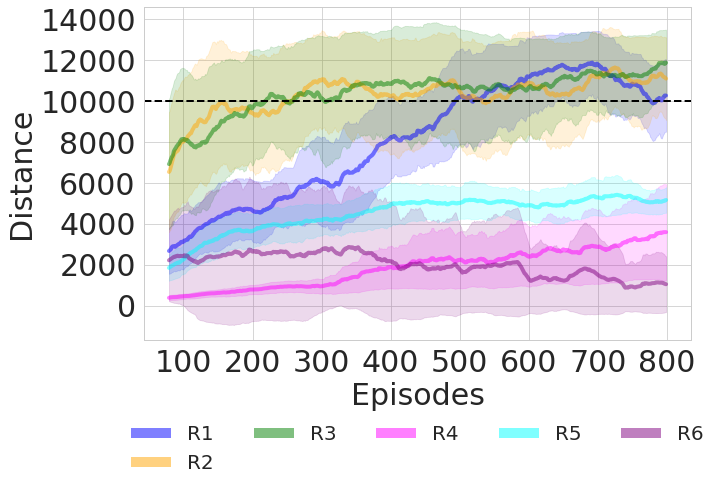

In [692]:
# Smooth the data
WIN_SIZE = 80
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means_r2, stds_r2 = smoothen(returns_r2_mean, WIN_SIZE), smoothen(returns_r2_std, WIN_SIZE)
means_r3, stds_r3 = smoothen(returns_r3_mean, WIN_SIZE), smoothen(returns_r3_std, WIN_SIZE)
means_r4, stds_r4 = smoothen(returns_r4_mean, WIN_SIZE), smoothen(returns_r4_std, WIN_SIZE)
means_r5, stds_r5 = smoothen(returns_r5_mean, WIN_SIZE), smoothen(returns_r5_std, WIN_SIZE)
means_r6, stds_r6 = smoothen(returns_r6_mean, WIN_SIZE), smoothen(returns_r6_std, WIN_SIZE)

# Generate the plot
means, stds = (means_r1, means_r2, means_r3, means_r4, means_r5, means_r6), (stds_r1, stds_r2, stds_r3, stds_r4, stds_r5, stds_r6)
generate_plot(means, stds, "distance_result_plot")

In [ ]:
#lap time

In [628]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
# plt.rcParams['text.usetex'] = True

import seaborn as sns
sns.set_context("paper")

sns.set_style("whitegrid")

from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

In [704]:
def get_laptime(reward_type, log_num):
    # Path to your log file
    log_file_path = f"./all_debug_logs/debug_{reward_type}_{log_num}.log"

    # Initialize lists to store the extracted data
    path_length_mean_data = []
    vel_mean_data = []
    distances_mean_data = []
    lap_times = []

    # Regular expression patterns to find the relevant entries
    path_length_pattern = re.compile(r'training/path length Mean\s+([\d\.]+)')
    vel_pattern = re.compile(r'training/env_infos/average/vel Mean\s+([-]?\d*\.\d+|\d+)')
    lap_time_pattern = re.compile(r'time/epoch \(s\)\s+([-]?\d*\.\d+|\d+)')

    # Read the log file
    with open(log_file_path, 'r') as file:
        for line in file:
            path_length_match = path_length_pattern.search(line)
            vel_match = vel_pattern.search(line)
            lap_time_match = lap_time_pattern.search(line)

            if path_length_match:
                path_length_returns_mean = float(path_length_match.group(1))
                path_length_mean_data.append(path_length_returns_mean)
            if vel_match:
                vel_returns_mean = float(vel_match.group(1))
                vel_mean_data.append(vel_returns_mean)
            if lap_time_match:
                lap_time = float(lap_time_match.group(1))
                lap_times.append(lap_time)

    # Calculate distances
    distances = []
    if path_length_mean_data and vel_mean_data:
        distances = [a * b for a, b in zip(path_length_mean_data, vel_mean_data)]
#     print(distances)

    # Store lap times based on distance condition
    lap_times_filtered = []
    for distance, lap_time in zip(distances, lap_times):
#         print(distance)
        if distance >= 9500.0:
            lap_times_filtered.append(lap_time)
        else:
            lap_times_filtered.append(np.nan)
    
#     print(lap_times_filtered)
    df = pd.DataFrame(lap_times_filtered, columns=['Lap Time'])
    laptime = df.values.reshape(1, -1)[0]
#     returns = (returns - min(returns))/(max(returns) - min(returns))
#     print(laptime)
    return laptime

In [630]:
def normalize_data(data, max_val=12000):
    min_val = min(data)
    return [(x - min_val) / (max_val - min_val) for x in data]

def smoothen(arr, smoothing_window=100):
    smoothed_arr = (pd.Series(arr)
        .rolling(smoothing_window, min_periods=smoothing_window)
        .mean()
        )
    return smoothed_arr.values

def generate_plot(means, stds, save_path=""):
    qrsac_r1_mean, qrsac_r2_mean, qrsac_r3_mean, qrsac_r4_mean, qrsac_r5_mean = means
    qrsac_r1_std, qrsac_r2_std, qrsac_r3_std, qrsac_r4_std, qrsac_r5_std = stds
    
    qrsac_r1_xs, qrsac_r2_xs, qrsac_r3_xs, qrsac_r4_xs, qrsac_r5_xs = np.arange(len(qrsac_r1_mean)), np.arange(len(qrsac_r2_mean)), np.arange(len(qrsac_r3_mean)), np.arange(len(qrsac_r4_mean)), np.arange(len(qrsac_r5_mean))

    fig, ax = plt.subplots(figsize=(10, 7))
    # fig, ax = plt.subplots(figsize=(11, 8))
    
#     print(qrsac_r1_mean)

    plt.plot(qrsac_r1_xs, qrsac_r1_mean, c="b", label="R1", linewidth=4, alpha=0.5)
    plt.plot(qrsac_r2_xs, qrsac_r2_mean, c="orange", label="R2", linewidth=4, alpha=0.5)
    plt.plot(qrsac_r3_xs, qrsac_r3_mean, c="g", label="R3", linewidth=4, alpha=0.5)
    plt.plot(qrsac_r4_xs, qrsac_r4_mean, c="magenta", label="R4", linewidth=4, alpha=0.5)   
    plt.plot(qrsac_r5_xs, qrsac_r5_mean, c="cyan", label="R5", linewidth=4, alpha=0.5) 


#     plt.scatter(qrsac_r1_xs, qrsac_r1_mean, c="b", label="R1", alpha=0.5)
#     plt.scatter(qrsac_r2_xs, qrsac_r2_mean, c="orange", label="R2", alpha=0.5)
#     plt.scatter(qrsac_r3_xs, qrsac_r3_mean, c="g", label="R3", alpha=0.5)
#     plt.scatter(qrsac_r4_xs, qrsac_r4_mean, c="magenta", label="R4", alpha=0.5)   
#     plt.scatter(qrsac_r5_xs, qrsac_r5_mean, c="cyan", label="R5", alpha=0.5) 

#     # Interpolate the data points
#     interp_r1 = interp1d(qrsac_r1_xs, qrsac_r1_mean, kind='linear', fill_value="extrapolate")
#     interp_r2 = interp1d(qrsac_r2_xs, qrsac_r2_mean, kind='linear', fill_value="extrapolate")
#     interp_r3 = interp1d(qrsac_r3_xs, qrsac_r3_mean, kind='linear', fill_value="extrapolate")
#     interp_r4 = interp1d(qrsac_r4_xs, qrsac_r4_mean, kind='linear', fill_value="extrapolate")
#     interp_r5 = interp1d(qrsac_r5_xs, qrsac_r5_mean, kind='linear', fill_value="extrapolate")

#     # Generate continuous data points
#     xs = np.linspace(0, max(len(qrsac_r1_mean), len(qrsac_r2_mean), len(qrsac_r3_mean), len(qrsac_r4_mean), len(qrsac_r5_mean)), num=1000)

#     # Plot the interpolated lines
#     plt.plot(xs, interp_r1(xs), c="b", linewidth=2, alpha=0.7)
#     plt.plot(xs, interp_r2(xs), c="orange", linewidth=2, alpha=0.7)
#     plt.plot(xs, interp_r3(xs), c="g", linewidth=2, alpha=0.7)
#     plt.plot(xs, interp_r4(xs), c="magenta", linewidth=2, alpha=0.7)
#     plt.plot(xs, interp_r5(xs), c="cyan", linewidth=2, alpha=0.7)

    
    
    plt.fill_between(qrsac_r1_xs,
                    qrsac_r1_mean - qrsac_r1_std,
                    qrsac_r1_mean + qrsac_r1_std,
                    color="b", alpha=0.25)
    plt.fill_between(qrsac_r2_xs,
                    qrsac_r2_mean - qrsac_r2_std,
                    qrsac_r2_mean + qrsac_r2_std,
                    color="orange", alpha=0.25)
    plt.fill_between(qrsac_r3_xs,
                    qrsac_r3_mean - qrsac_r3_std,
                    qrsac_r3_mean + qrsac_r3_std,
                    color="green", alpha=0.25)    
    plt.fill_between(qrsac_r4_xs,
                    qrsac_r4_mean - qrsac_r4_std,
                    qrsac_r4_mean + qrsac_r4_std,
                    color="magenta", alpha=0.25)                                                                                                                                
    plt.fill_between(qrsac_r5_xs,
                    qrsac_r5_mean - qrsac_r5_std,
                    qrsac_r5_mean + qrsac_r5_std,
                    color="cyan", alpha=0.25) 
#     plt.fill_between(qrsac_r6_xs,
#                     qrsac_r6_mean - qrsac_r6_std,
#                     qrsac_r6_mean + qrsac_r6_std,
#                     color="purple", alpha=0.15)
                                                                                                                                
    # plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
    #            ncol=3, fancybox=True, shadow=True, fontsize=18)
    # plt.legend(loc="best", fontsize=30)
    # plt.ylim([-20, 30])
    leg = plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", 
               ncol=5, frameon=False, fancybox=False, shadow=False,
               fontsize=20)
    for line in leg.get_lines():
        line.set_linewidth(10.0)
        line.set_solid_capstyle('butt')
    # plt.ylim([-300, 330])
    plt.yticks(fontsize=30)
    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(
    #     lambda x,pos: format(x/1000000,'1.1f')))
    plt.xticks(fontsize=30)
    plt.xlabel("Episodes", fontsize=30)
    plt.ylabel("Lap Time", fontsize=30)
    # plt.title(r"Walker2d-v3 ($N$=3)", fontsize=30)
    # plt.grid(False)
    plt.tight_layout()
    plt.savefig(f"{save_path}.png", dpi=200)
    plt.show()

In [631]:
returns_1 = [get_laptime("state32", idx)[:800] for idx in range(1, 3)]
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)

returns_2 = [get_laptime("state32_rew", idx)[:800] for idx in range(1, 4)]
returns_r2_mean = np.mean(returns_2, axis=0)
returns_r2_std = np.std(returns_2, axis=0)

returns_3 = [get_laptime("state32_rew_throttle", idx)[:800] for idx in range(1, 4)]
returns_r3_mean = np.mean(returns_3, axis=0)
returns_r3_std = np.std(returns_3, axis=0)

returns_4 = [get_laptime("state39_rew", idx)[:800] for idx in range(1, 3)]
returns_r4_mean = np.mean(returns_4, axis=0)
returns_r4_std = np.std(returns_4, axis=0)

returns_5 = [get_laptime("state32_throttle", idx)[:800] for idx in range(1, 3)]
returns_r5_mean = np.mean(returns_5, axis=0)
returns_r5_std = np.std(returns_5, axis=0)

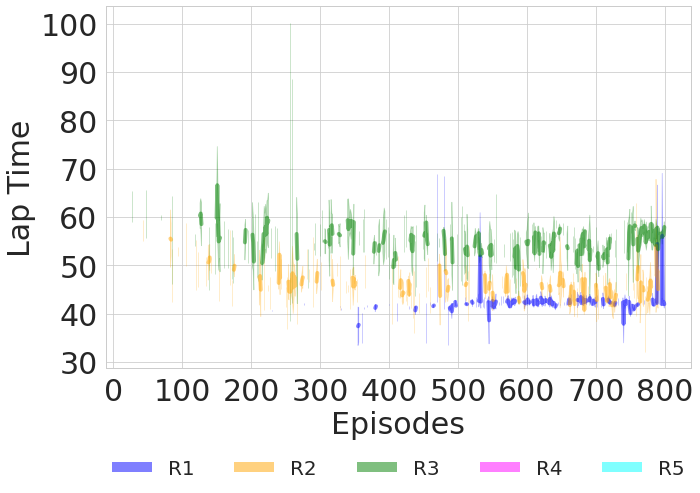

In [632]:
#Smooth the data
WIN_SIZE = 1
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means_r2, stds_r2 = smoothen(returns_r2_mean, WIN_SIZE), smoothen(returns_r2_std, WIN_SIZE)
means_r3, stds_r3 = smoothen(returns_r3_mean, WIN_SIZE), smoothen(returns_r3_std, WIN_SIZE)
means_r4, stds_r4 = smoothen(returns_r4_mean, WIN_SIZE), smoothen(returns_r4_std, WIN_SIZE)
means_r5, stds_r5 = smoothen(returns_r5_mean, WIN_SIZE), smoothen(returns_r5_std, WIN_SIZE)

# Generate the plot
means, stds = (means_r1, means_r2, means_r3, means_r4, means_r5), (stds_r1, stds_r2, stds_r3, stds_r4, stds_r5)
generate_plot(means, stds, "laptime_result_plot")

In [705]:
returns_1 = [get_laptime("state32", idx)[:800] for idx in range(1, 3)]
returns_r1_mean = np.mean(returns_1, axis=0)
returns_r1_std = np.std(returns_1, axis=0)

returns_2 = [get_laptime("state32_rew", idx)[:800] for idx in range(1, 4)]
returns_r2_mean = np.mean(returns_2, axis=0)
returns_r2_std = np.std(returns_2, axis=0)

returns_3 = [get_laptime("state32_rew_throttle", idx)[:800] for idx in range(1, 4)]
returns_r3_mean = np.mean(returns_3, axis=0)
returns_r3_std = np.std(returns_3, axis=0)

returns_4 = [get_laptime("state39_rew", idx)[:800] for idx in range(1, 3)]
returns_r4_mean = np.mean(returns_4, axis=0)
returns_r4_std = np.std(returns_4, axis=0)

returns_5 = [get_laptime("state32_throttle", idx)[:800] for idx in range(1, 3)]
returns_r5_mean = np.mean(returns_5, axis=0)
returns_r5_std = np.std(returns_5, axis=0)

# returns_7 = [get_laptime("state32_rew_1300", idx)[:1290] for idx in range(1, 2)]
# returns_r7_mean = np.mean(returns_7, axis=0)
# returns_r7_std = np.std(returns_7, axis=0)



In [706]:
#Smooth the data
WIN_SIZE = 1
means_r1, stds_r1 = smoothen(returns_r1_mean, WIN_SIZE), smoothen(returns_r1_std, WIN_SIZE)
means_r2, stds_r2 = smoothen(returns_r2_mean, WIN_SIZE), smoothen(returns_r2_std, WIN_SIZE)
means_r3, stds_r3 = smoothen(returns_r3_mean, WIN_SIZE), smoothen(returns_r3_std, WIN_SIZE)
means_r4, stds_r4 = smoothen(returns_r4_mean, WIN_SIZE), smoothen(returns_r4_std, WIN_SIZE)
means_r5, stds_r5 = smoothen(returns_r5_mean, WIN_SIZE), smoothen(returns_r5_std, WIN_SIZE)

# means_r7, stds_r7 = smoothen(returns_r7_mean, WIN_SIZE), smoothen(returns_r7_std, WIN_SIZE)

# # Generate the plot
# means, stds = (means_r1, means_r2, means_r3, means_r4, means_r5), (stds_r1, stds_r2, stds_r3, stds_r4, stds_r5)
# generate_plot(means, stds, "laptime_result_plot")

In [708]:
def compute_means_and_percentages(data, interval=200):
    n_intervals = len(data) // interval
    mean_of_means = [np.nanmean(data[i*interval:(i+1)*interval]) for i in range(n_intervals)]
    percentages = [np.count_nonzero(~np.isnan(data[i*interval:(i+1)*interval])) / interval * 100 for i in range(n_intervals)]
    total_percentage = np.count_nonzero(~np.isnan(data)) / len(data) * 100
    return mean_of_means, percentages, total_percentage

# Assuming means_r1, ..., means_r5 are already defined
means_percentages = [
    compute_means_and_percentages(means_r1),
    compute_means_and_percentages(means_r2),
    compute_means_and_percentages(means_r3),
    compute_means_and_percentages(means_r4),
    compute_means_and_percentages(means_r5),
]

# Create LaTeX table
interval_labels = ["0-199", "200-399", "400-599", "600-799"]
column_labels = ["R1", "R2", "R3", "R4", "R5"]

latex_table = r"\begin{table}[h!]" + "\n" + r"\centering" + "\n"
latex_table += r"\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|}" + "\n"
latex_table += r"\hline" + "\n"
latex_table += r"Interval & \multicolumn{2}{c|}{R1} & \multicolumn{2}{c|}{R2} & \multicolumn{2}{c|}{R3} & \multicolumn{2}{c|}{R4} & \multicolumn{2}{c|}{R5} \\" + "\n"
latex_table += r"\hline" + "\n"
latex_table += r" & Mean & \% Complete & Mean & \% Complete & Mean & \% Complete & Mean & \% Complete & Mean & \% Complete \\" + "\n"
latex_table += r"\hline" + "\n"

for i, label in enumerate(interval_labels):
    row = f"{label} "
    for mean_of_means, percentages, _ in means_percentages:
        row += f"& {mean_of_means[i]:.2f} & {percentages[i]:.2f} "
    row += r"\\" + "\n"
    row += r"\hline" + "\n"
    latex_table += row

# Add the total percentage row
total_row = "Total "
for _, _, total_percentage in means_percentages:
    total_row += f"& - & {total_percentage:.2f} "
total_row += r"\\" + "\n"
total_row += r"\hline" + "\n"
latex_table += total_row

latex_table += r"\end{tabular}" + "\n"
latex_table += r"\caption{Means and percentages of lap time completion over intervals}" + "\n"
latex_table += r"\label{table:means_percentages}" + "\n"
latex_table += r"\end{table}" + "\n"

print(latex_table)

\begin{table}[h!]
\centering
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|}
\hline
Interval & \multicolumn{2}{c|}{R1} & \multicolumn{2}{c|}{R2} & \multicolumn{2}{c|}{R3} & \multicolumn{2}{c|}{R4} & \multicolumn{2}{c|}{R5} \\
\hline
 & Mean & \% Complete & Mean & \% Complete & Mean & \% Complete & Mean & \% Complete & Mean & \% Complete \\
\hline
0-199 & nan & 0.00 & 50.82 & 9.00 & 56.79 & 11.50 & nan & 0.00 & nan & 0.00 \\
\hline
200-399 & 40.23 & 5.50 & 46.65 & 23.50 & 56.09 & 31.00 & nan & 0.00 & nan & 0.00 \\
\hline
400-599 & 42.38 & 31.50 & 45.48 & 25.50 & 53.63 & 32.00 & nan & 0.00 & nan & 0.00 \\
\hline
600-799 & 42.55 & 49.00 & 45.02 & 33.00 & 54.94 & 56.00 & nan & 0.00 & nan & 0.00 \\
\hline
Total & - & 21.50 & - & 22.75 & - & 32.62 & - & 0.00 & - & 0.00 \\
\hline
\end{tabular}
\caption{Means and percentages of lap time completion over intervals}
\label{table:means_percentages}
\end{table}



/tmp/ipykernel_1221447/412933107.py:3: RuntimeWarning: Mean of empty slice
  mean_of_means = [np.nanmean(data[i*interval:(i+1)*interval]) for i in range(n_intervals)]
